In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Necessary to get names out
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

d:\python\python38\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
features_num = [
    "RA", "DEC", "E_RA", "E_DEC", "Total_flux", "E_Total_flux", "Peak_flux", 
    "E_Peak_flux", "Maj", "Min", "PA", "E_Maj", "E_Min", "E_PA", "DC_Maj", 
    "DC_Min", "DC_PA", "Isl_rms", "lr_fin", "ALPHA_J2000", "DELTA_J2000", "EBV", 
    "NUV_flux_corr", "NUV_fluxerr_corr", "NUV_mag_corr", "NUV_magerr_corr", 
    "u_flux_corr", "u_fluxerr_corr", "u_mag_corr", "u_magerr_corr", 
    "Bw_flux_corr", "Bw_fluxerr_corr", "Bw_mag_corr", "Bw_magerr_corr", 
    "R_flux_corr", "R_fluxerr_corr", "R_mag_corr", "R_magerr_corr", "I_flux_corr", 
    "I_fluxerr_corr", "I_mag_corr", "I_magerr_corr", "z_flux_corr", "z_fluxerr_corr", 
    "z_mag_corr", "z_magerr_corr", "z_Subaru_flux_corr", "z_Subaru_fluxerr_corr", "z_Subaru_mag_corr", 
    "z_Subaru_magerr_corr", "y_flux_corr", "y_fluxerr_corr", "y_mag_corr", 
    "y_magerr_corr", "J_flux_corr", "J_fluxerr_corr", "J_mag_corr", 
    "J_magerr_corr", "H_flux_corr", "H_mag_corr", "H_magerr_corr", 
    "K_flux_corr", "K_fluxerr_corr", "K_mag_corr", "K_magerr_corr",  
    "Ks_fluxerr_corr", "Ks_mag_corr", "Ks_magerr_corr", "ch1_flux_corr",  
    "ch1_fluxerr_corr", "ch1_mag_corr", "ch1_magerr_corr", "ch2_flux_corr", 
    "ch2_fluxerr_corr", "ch2_mag_corr", "ch3_flux_corr", "ch3_fluxerr_corr", 
    "ch3_mag_corr", "ch3_magerr_corr",  "ch4_flux_corr", "ch4_fluxerr_corr",  
    "ch4_magerr_corr",  "Separation", "CLASS_STAR",  
    "F_MIPS_24", "FErr_MIPS_24_u",  "FErr_MIPS_24_l", "Bkg_MIPS_24",  
    "Sig_conf_MIPS_24", "Rhat_MIPS_24", "n_eff_MIPS_24", "Pval_res_24",  
    "F_PACS_100", "FErr_PACS_100_u", "FErr_PACS_100_l", "F_PACS_160",  
    "FErr_PACS_160_u", "FErr_PACS_160_l", "Bkg_PACS_100", "Bkg_PACS_160",  
    "Sig_conf_PACS_100", "Sig_conf_PACS_160", "Rhat_PACS_100", "Rhat_PACS_160",  
    "n_eff_PACS_100",  "n_eff_PACS_160",  "Pval_res_100",  "Pval_res_160",  
    "F_SPIRE_250",  "FErr_SPIRE_250_u",  "FErr_SPIRE_250_l", "F_SPIRE_350", 
    "FErr_SPIRE_350_u", "FErr_SPIRE_350_l", "F_SPIRE_500", "FErr_SPIRE_500_u", 
    "FErr_SPIRE_500_l", "Bkg_SPIRE_250", "Bkg_SPIRE_350", "Bkg_SPIRE_500", 
    "Sig_conf_SPIRE_250", "Sig_conf_SPIRE_350", "Sig_conf_SPIRE_500", 
    "Rhat_SPIRE_250", "Rhat_SPIRE_350", "Rhat_SPIRE_500", "n_eff_SPIRE_250", 
    "n_eff_SPIRE_500", "n_eff_SPIRE_350", "Pval_res_250", "Pval_res_350", 
    "Pval_res_500", "Z_BEST", "Z_BEST_SOURCE", "Z_SPEC", "Z_SOURCE", 
    "Z_QUAL", "RA_ZSPEC", "DEC_ZSPEC", "REL", "z1_median", "z1_min", 
    "z1_max", "z1_area", "z2_median", "z2_min", "z2_max", "z2_area", 
    "nfilt_eazy", "nfilt_atlas", "nfilt_ananna", "chi_r_best", 
    "chi_r_stellar", "zmodel", "chi_best", "Mass_median", 
    "Mass_l68", "Mass_u68", "Nfilts", "u_rest", "Bw_rest", "R_rest", 
    "I_rest", "z_rest", "z_Subaru_rest", "y_rest", "J_rest", "H_rest", 
    "K_rest", "Ks_rest", "ch1_rest", "ch2_rest", "ch3_rest", "ch4_rest", 
    "XrayFlux_0.5-2", "XrayHardness", 'FUV_flux_corr', 'FUV_fluxerr_corr', 
    'FUV_mag_corr', 'FUV_magerr_corr', 'H_fluxerr_corr', 'Ks_flux_corr', 
    'ch2_magerr_corr', 'ch4_mag_corr'

]

not_sure_columns = [
    "AGN", "optAGN", "IRAGN", "AGN_ZSPEC", "XrayAGN", "ap_to_model_z_Subaru", 
    "ap_to_model_err_z_Subaru", "ap_to_model_z", "ap_to_model_err_z", 
]

not_using_columns = [
    "AGN_final", "RadioAGN_final", "FLAG_OVERLAP_RADIO", "NoID", "optRA", "optDec", "LGZ_Size", "LGZ_Width",
    'Source_Name', 'NoID', 'optRA', 'optDec', 'LGZ_Size', 'LGZ_Width', 'LGZ_PA', 
    'Assoc', 'Assoc_Qual', 'Art_prob', 'Blend_prob', 'Hostbroken_prob', 'Imagemissing_prob', 
    'Zoom_prob', 'FLAG_DEEP', 'ID_OPTICAL', 'ID_SPITZER', 'ID', 
    'help_id', 'RA_HELP', 'DEC_HELP', 'OBJID'
]
    

features_cat_binary = [
    "flag_mips_24", "flag_PACS_100", "flag_PACS_160", "flag_spire_250", 
    "flag_spire_350", "flag_spire_500", "XID+_rerun_mips", "XID+_rerun_pacs", 
    "XID+_rerun_SPIRE", "Position_from", "FLAG_OVERLAP"
]
features_cat_non_binary = [
   "S_Code", "FLAG_WORKFLOW", "Prefilter", "Created", "flag_clean_radio", "flag_clean", "stellar_type"
]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [8]:
data = pd.read_csv("../../../Data/Fangyou_data/Cleaned/Complete_Bootes_clean.csv")

<AxesSubplot:>

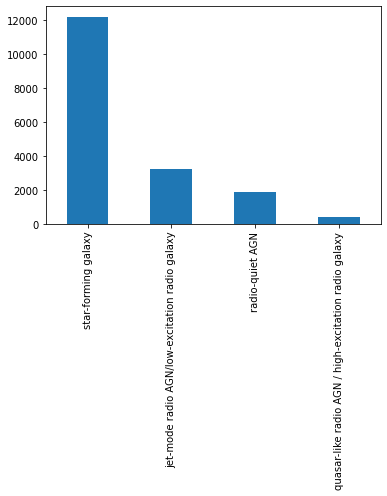

In [9]:
# Changing infinities into nan's
data = data.replace([np.inf,-np.inf], np.nan)
data['Classification'].value_counts().plot(kind='bar')

In [5]:
# Finding dropped columns
new_data = data.dropna(thresh=17000, axis=1)
new_columns = new_data.columns

dropped_columns = []
for column in data.columns:
    if column not in new_columns:
        dropped_columns.append(column)

In [6]:
for column in dropped_columns:
    if column in features_num:
        features_num.remove(column)
    elif column in features_cat_binary:
        features_cat_binary.remove(column)
    elif column in features_cat_non_binary:
        features_cat_non_binary.remove(column)

In [7]:
data = new_data

In [10]:
# Creating the pipeline
transformer_num = make_pipeline(
    SimpleImputer(strategy="mean"),  # there are a few missing values
    StandardScaler(),
)
# Almost all cat features are already binary, so don't have to be one-hot encoded
transformer_cat_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
)
transformer_cat_non_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat_binary, features_cat_binary),
    (transformer_cat_non_binary, features_cat_non_binary),
)

In [11]:
# Dropping required columns
X = data
y = data[y_column]

In [12]:
# Manually ordinally encoding, since we cannot use get_features_names out else
X[features_cat_binary] = OrdinalEncoder().fit_transform(X[features_cat_binary])

In [13]:
# Transforming y to labels
le = preprocessing.LabelEncoder()
labels = np.unique(y)
y = le.fit_transform(y)

# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [14]:
# Transforming the data, data that isn't in any of the pipelines is dropped automatically
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [15]:
# Class weights
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# PCA

# Random forest

In [24]:
clf = RandomForestClassifier(n_estimators=20, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=20)

In [25]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8027    0.6328    0.7077       945
quasar-like radio AGN / high-excitation radio galaxy     0.5714    0.1739    0.2667       115
                                     radio-quiet AGN     0.8229    0.4653    0.5944       619
                                 star-forming galaxy     0.8329    0.9585    0.8913      3640

                                            accuracy                         0.8263      5319
                                           macro avg     0.7575    0.5576    0.6150      5319
                                        weighted avg     0.8207    0.8263    0.8106      5319



[]

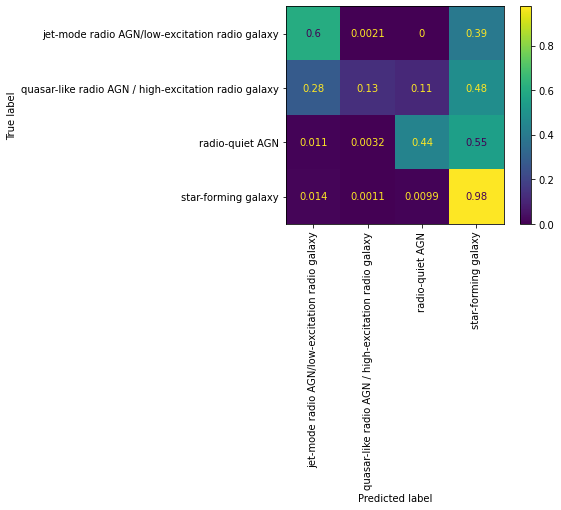

In [18]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

In [19]:
random_forest_feature_importance = pd.DataFrame(
    np.array([preprocessor.get_feature_names_out(), clf.feature_importances_]).T,
                                               columns=['Feature', 'Importance'])
random_forest_feature_importance = random_forest_feature_importance.sort_values(by=['Importance'], ascending=False)

[]

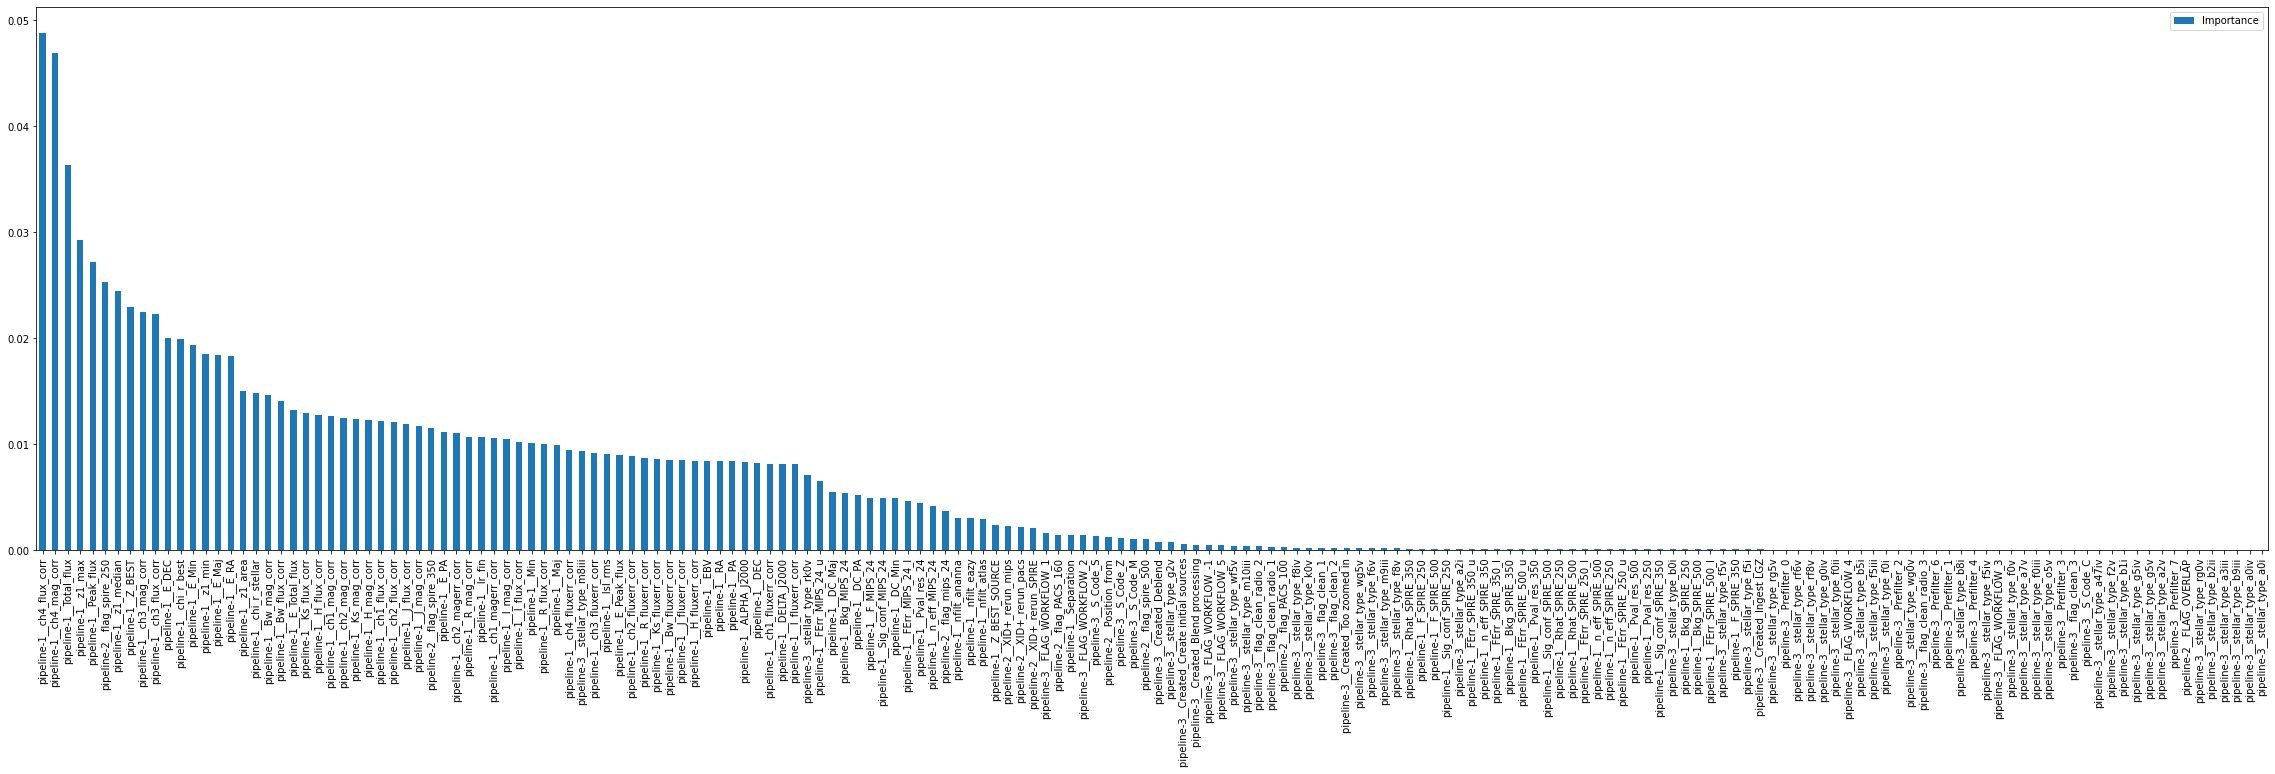

In [20]:
ax = random_forest_feature_importance.plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

In [21]:
random_forest_feature_importance["Cumulative"] = np.cumsum(random_forest_feature_importance["Importance"])
random_forest_feature_importance

,Feature,Importance,Cumulative
48,pipeline-1__ch4_flux_corr,0.048855,0.048855
96,pipeline-1__ch4_mag_corr,0.04696,0.095815
4,pipeline-1__Total_flux,0.036366,0.132181
86,pipeline-1__z1_max,0.029317,0.161498
6,pipeline-1__Peak_flux,0.02725,0.188747
...,...,...,...
145,pipeline-3__stellar_type_b2ii,0.000001,0.999999
140,pipeline-3__stellar_type_a3iii,0.000001,0.999999
148,pipeline-3__stellar_type_b9iii,0.000001,1.0
137,pipeline-3__stellar_type_a0iv,0.0,1.0


In [22]:
random_forest_feature_importance.iloc[0:150,2]

48     0.048855
96     0.095815
4      0.132181
86     0.161498
6      0.188747
         ...   
146    0.999769
155    0.999794
149    0.999818
120    0.999835
176    0.999852
Name: Cumulative, Length: 150, dtype: object

[]

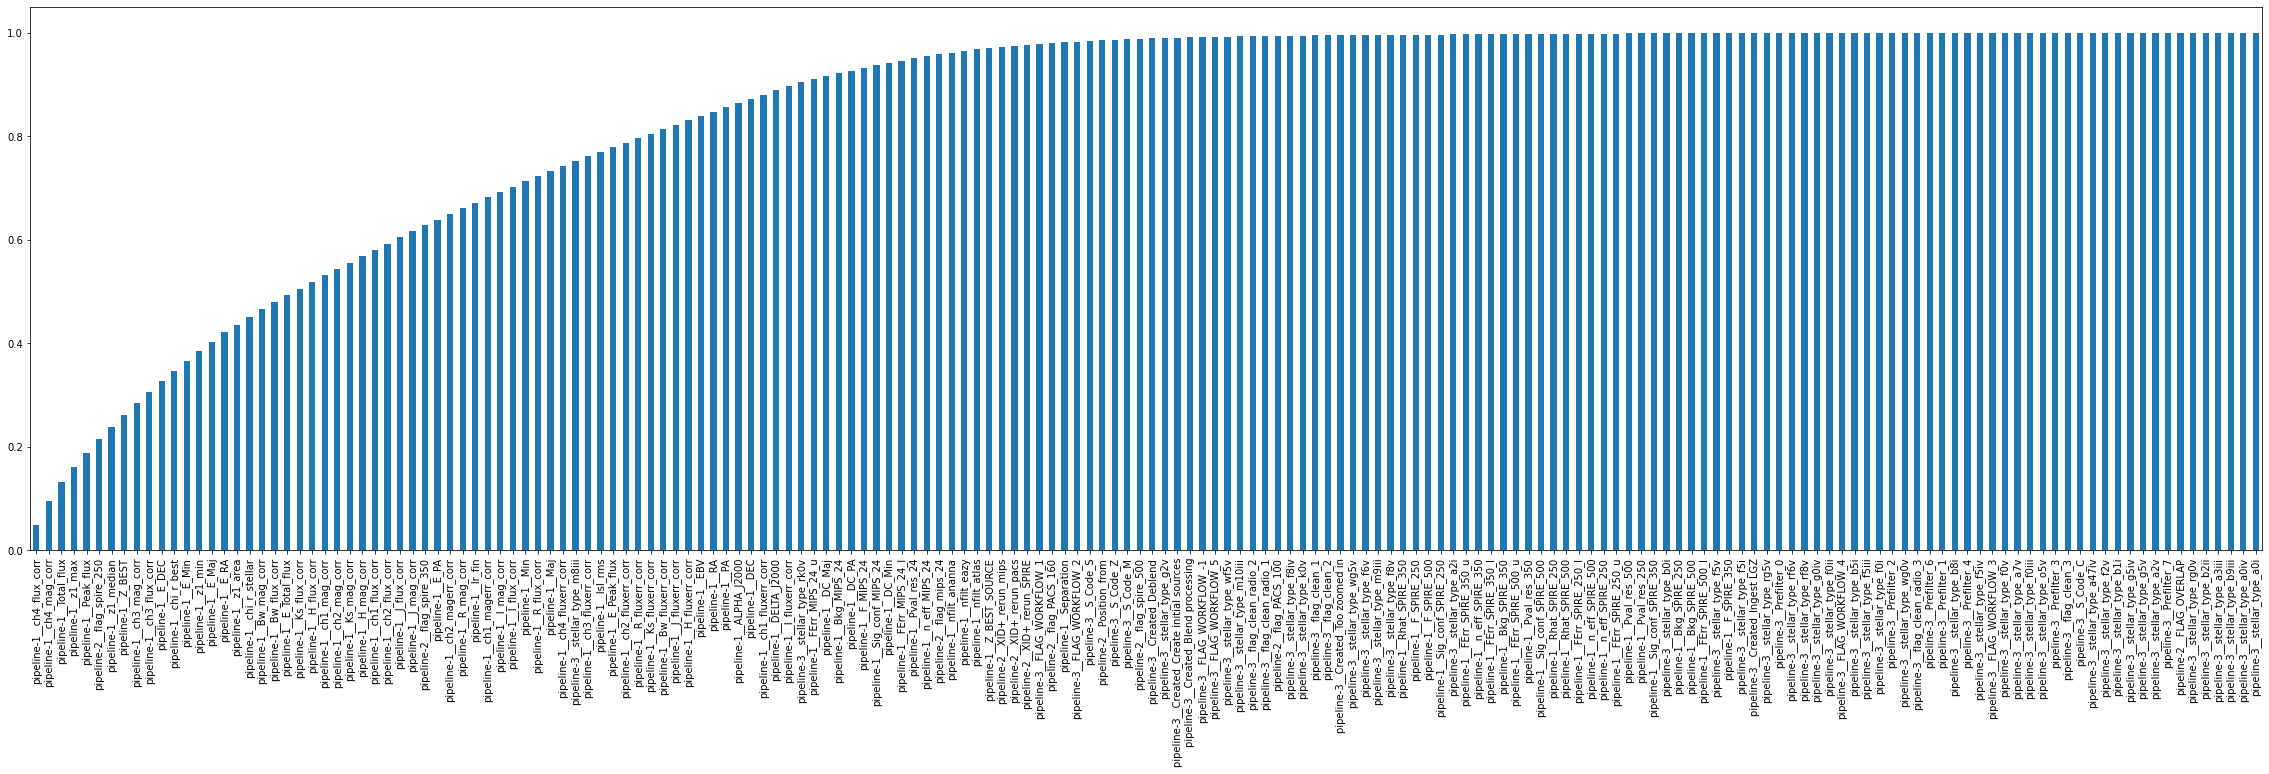

In [23]:
ax = random_forest_feature_importance['Cumulative'].plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

## Hyperparameter tuning

In [50]:
# Metrics for hyperparameter tuning
metrics = {"Accuracy": "accuracy",
          "Balanced accuracy": "balanced_accuracy",
          "F1 score": "f1_weighted"}

In [51]:
# Parameter space
parameters = {"n_estimators": [10,20,50,100,150,200],
             "criterion": ["gini", "entropy"],
             "max_depth": [10,30,50,70],
             "min_samples_split": [2,10,20],
             }

In [ ]:
random_forest = RandomForestClassifier()
clf = GridSearchCV(estimator=random_forest, 
                   param_grid=parameters,
                  scoring=metrics,
                  refit="Accuracy",
                  return_train_score=True,
                  n_jobs=-1,
                  cv=2,
                  verbose=4)

clf.fit(X_train, y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits



KeyboardInterrupt



In [53]:
clf

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50, 70],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [10, 20, 50, 100, 150, 200]},
             refit='Accuracy', return_train_score=True,
             scoring={'Accuracy': 'accuracy',
                      'Balanced accuracy': 'balanced_accuracy',
                      'F1 score': 'f1_weighted'},
             verbose=4)

In [54]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))


KeyboardInterrupt



# XGboost

In [32]:
model = XGBClassifier(use_label_encoder=False, max_depth=7)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=True)

C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.04128
[1]	validation_0-mlogloss:0.85290
[2]	validation_0-mlogloss:0.72724
[3]	validation_0-mlogloss:0.63828
[4]	validation_0-mlogloss:0.57570
[5]	validation_0-mlogloss:0.52889
[6]	validation_0-mlogloss:0.49574
[7]	validation_0-mlogloss:0.47011
[8]	validation_0-mlogloss:0.45159
[9]	validation_0-mlogloss:0.43423
[10]	validation_0-mlogloss:0.42204
[11]	validation_0-mlogloss:0.41291
[12]	validation_0-mlogloss:0.40633
[13]	validation_0-mlogloss:0.39965
[14]	validation_0-mlogloss:0.39388
[15]	validation_0-mlogloss:0.38942
[16]	validation_0-mlogloss:0.38572
[17]	validation_0-mlogloss:0.38137
[18]	validation_0-mlogloss:0.37830
[19]	validation_0-mlogloss:0.37624
[20]	validation_0-mlogloss:0.37526
[21]	validation_0-mlogloss:0.37242
[22]	validation_0-mlogloss:0.37092
[23]	validation_0-mlogloss:0.37024
[24]	validation_0-mlogloss:0.37025
[25]	validation_0-mlogloss:0.36941
[26]	validation_0-mlogloss:0.36853
[27]	validation_0-mlogloss:0.36775
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8677    0.7077    0.7796       992
quasar-like radio AGN / high-excitation radio galaxy     0.7255    0.3217    0.4458       115
                                     radio-quiet AGN     0.7780    0.6333    0.6983       570
                                 star-forming galaxy     0.8746    0.9594    0.9150      3642

                                            accuracy                         0.8637      5319
                                           macro avg     0.8115    0.6555    0.7097      5319
                                        weighted avg     0.8597    0.8637    0.8564      5319



[]

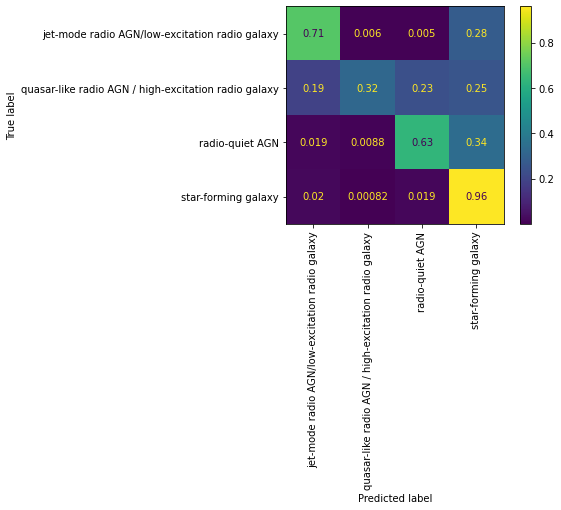

In [34]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# SVM

In [136]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [137]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8652    0.6405    0.7361       982
quasar-like radio AGN / high-excitation radio galaxy     1.0000    0.0403    0.0775       124
                                     radio-quiet AGN     0.7959    0.4333    0.5612       540
                                 star-forming galaxy     0.8355    0.9766    0.9006      3673

                                            accuracy                         0.8376      5319
                                           macro avg     0.8742    0.5227    0.5688      5319
                                        weighted avg     0.8408    0.8376    0.8166      5319



[]

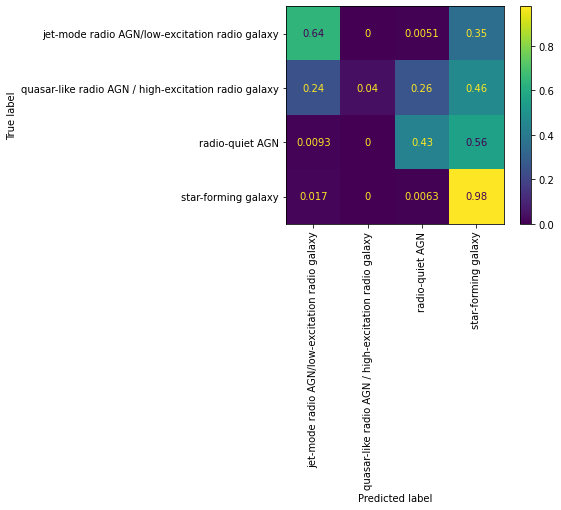

In [138]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()